In [1]:
# Importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset using pandas library
df=pd.read_csv('Downloads/heart-disease-uci.zip')

In [3]:
# First 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
# Lets check if there are null values are not
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Exploration

In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

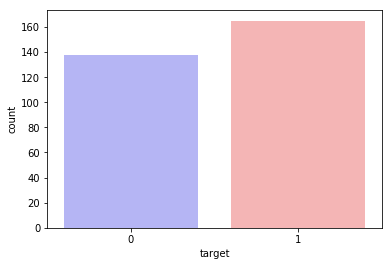

In [9]:
sns.countplot(x='target',data=df,palette='bwr')

In [10]:
countnoDisease=len(df[df.target==0])
counthaveDisease=len(df[df.target==1])
print('percentage of patients who havent heart disease:{:.2f}%'.format(countnoDisease/(len(df.target))*100))
print('percentage of patients who have heart disease:{:.2f}%'.format(counthaveDisease/(len(df.target))*100))

percentage of patients who havent heart disease:45.54%
percentage of patients who have heart disease:54.46%


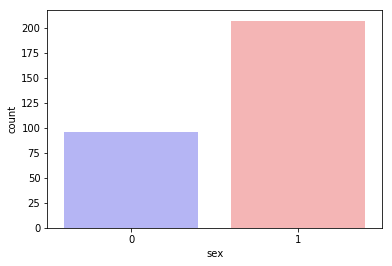

In [11]:
sns.countplot(x='sex',data=df,palette='bwr')

In [12]:
countMale=len(df[df.sex==1])
countFemale=len(df[df.sex==0])
print('percentage of Male:{:.2f}%'.format(countMale/(len(df.sex))*100))
print('percentage of Female:{:.2f}%'.format(countFemale/(len(df.sex))*100))

percentage of Male:68.32%
percentage of Female:31.68%


In [13]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


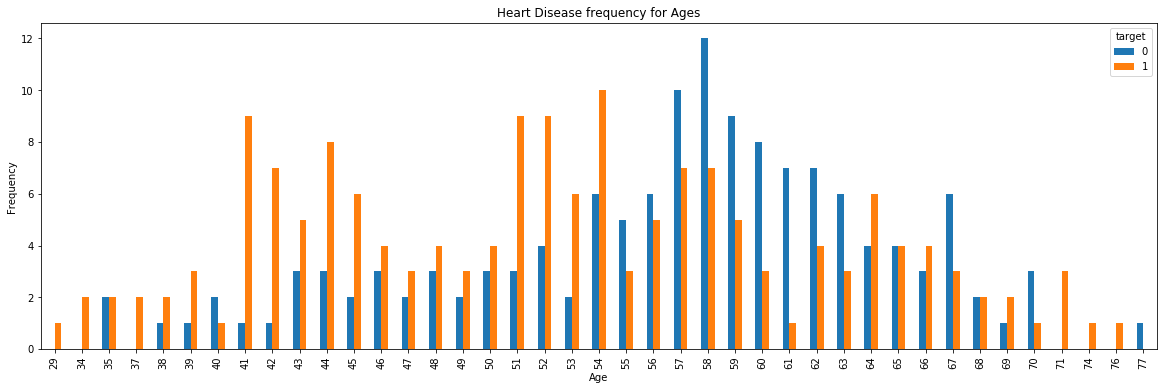

In [14]:
pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(20,6))
plt.title('Heart Disease frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

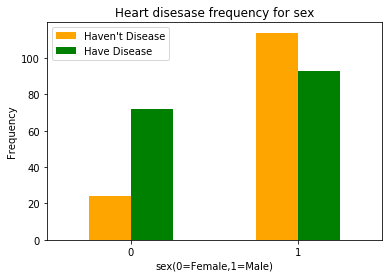

In [15]:
pd.crosstab(df.sex,df.target).plot(kind='bar',color=['orange','green'])
plt.xticks(rotation=0)
plt.xlabel('sex(0=Female,1=Male)')
plt.ylabel('Frequency')
plt.title('Heart disesase frequency for sex')
plt.legend(["Haven't Disease","Have Disease"])
plt.show()

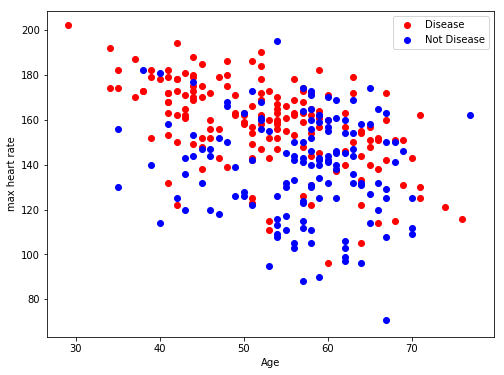

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(x=df.age[df.target==1],y=df.thalach[(df.target==1)],c='r')
plt.scatter(x=df.age[df.target==0],y=df.thalach[df.target==0],c='b')
plt.xlabel('Age')
plt.ylabel('max heart rate')
plt.legend(["Disease","Not Disease"])
plt.show()

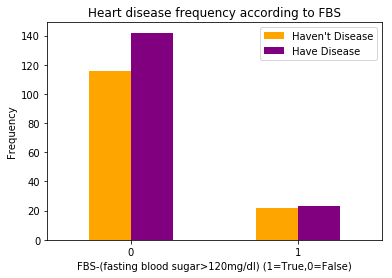

In [17]:
pd.crosstab(df.fbs,df.target).plot(kind='bar',color=['orange','purple'])
plt.xticks(rotation=0)
plt.xlabel('FBS-(fasting blood sugar>120mg/dl) (1=True,0=False)')
plt.ylabel('Frequency')
plt.title('Heart disease frequency according to FBS')
plt.legend(["Haven't Disease","Have Disease"])
plt.show()

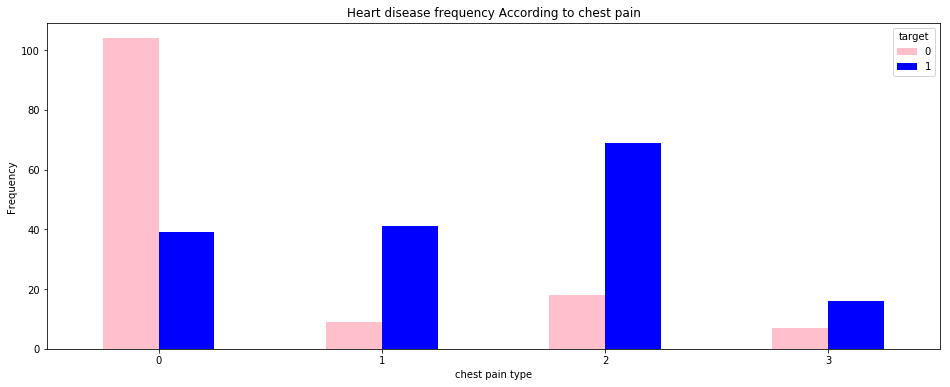

In [18]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(16,6),color=['pink','blue'])
plt.xticks(rotation=0)
plt.xlabel('chest pain type')
plt.ylabel('Frequency')
plt.title('Heart disease frequency According to chest pain')
plt.show()

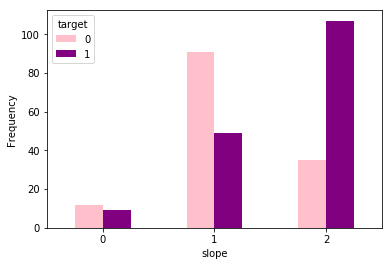

In [19]:
pd.crosstab(df.slope,df.target).plot(kind='bar',color=['pink','purple'])
plt.xticks(rotation=0)
plt.xlabel('slope')
plt.ylabel('Frequency')
plt.show()

In [20]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [21]:
x=df.drop('target',axis=1)
y=df.target

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_std=scaler.fit_transform(x)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [24]:
# splitting the data into training and testing 
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.25,random_state=1)

In [28]:
model=LogisticRegression()
# train the data
model.fit(x_train,y_train)
# predicting the response of the test data
y_pred=model.predict(x_test)

In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        32
           1       0.80      0.75      0.78        44

   micro avg       0.75      0.75      0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76



In [30]:
confusion_matrix(y_pred,y_test)

array([[24,  8],
       [11, 33]], dtype=int64)

In [31]:
print('Accuracy_score:',accuracy_score(y_pred,y_test))

Accuracy_score: 0.75


## By using Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [54]:
print('Accuracy_score:',accuracy_score(y_test,y_pred))

Accuracy_score: 0.7236842105263158


In [35]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

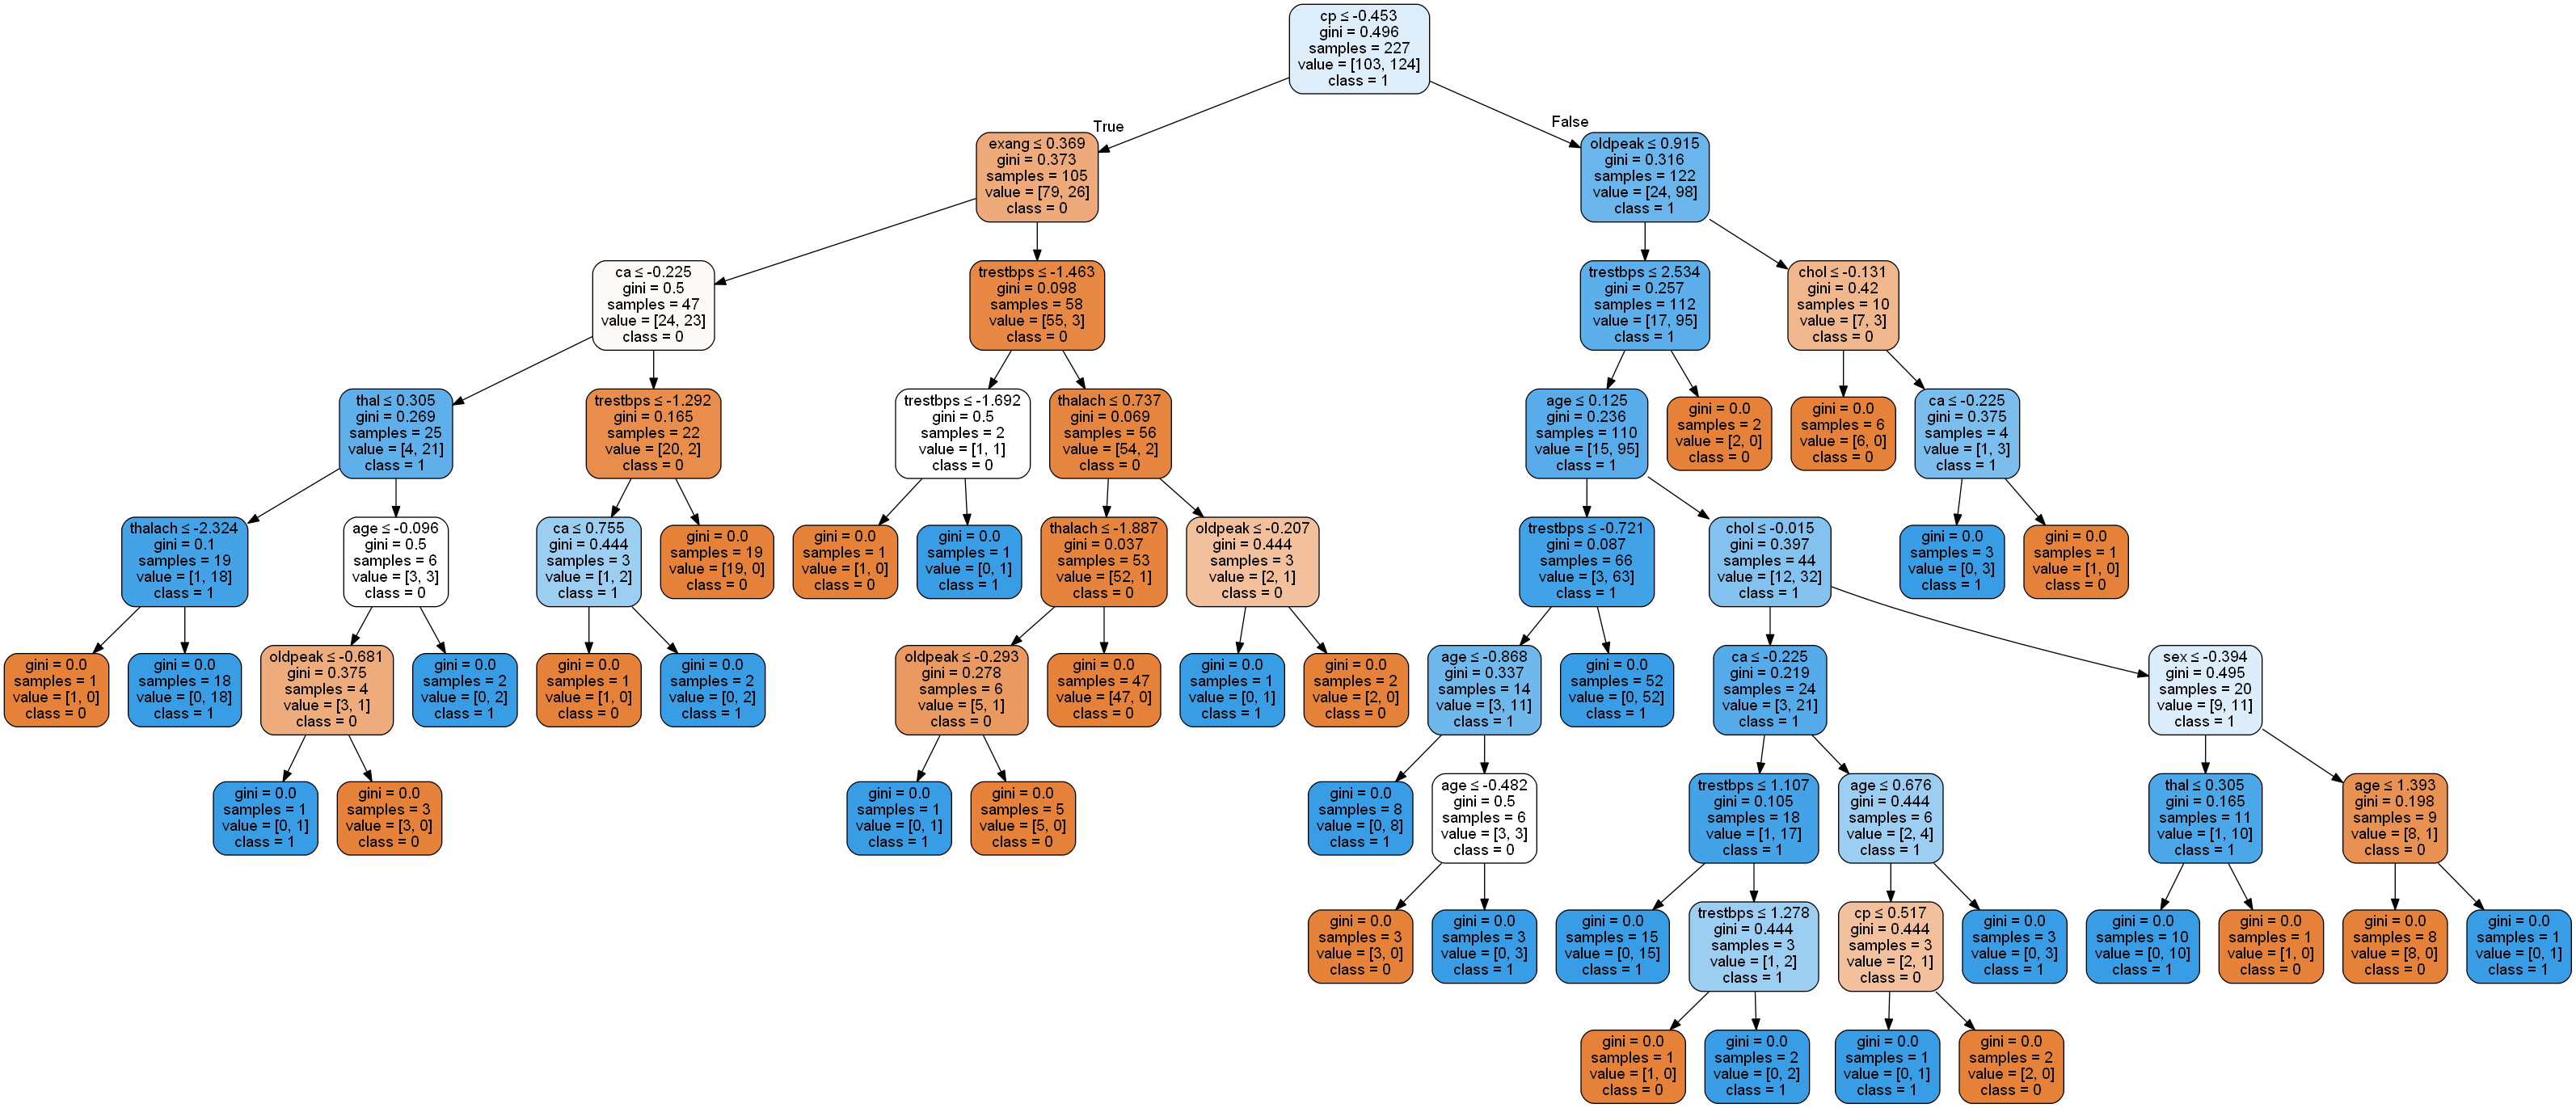

In [36]:
dot_data=StringIO()
export_graphviz(dt,
               out_file=dot_data,
               filled=True,
               rounded=True,
               special_characters=True,
               feature_names=x.columns,
               class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_pruned.png')
Image(graph.create_png())

In [44]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt1.fit(x_train,y_train)
y_pre=dt1.predict(x_test)

In [45]:
accuracy_score(y_pre,y_test)

0.7105263157894737

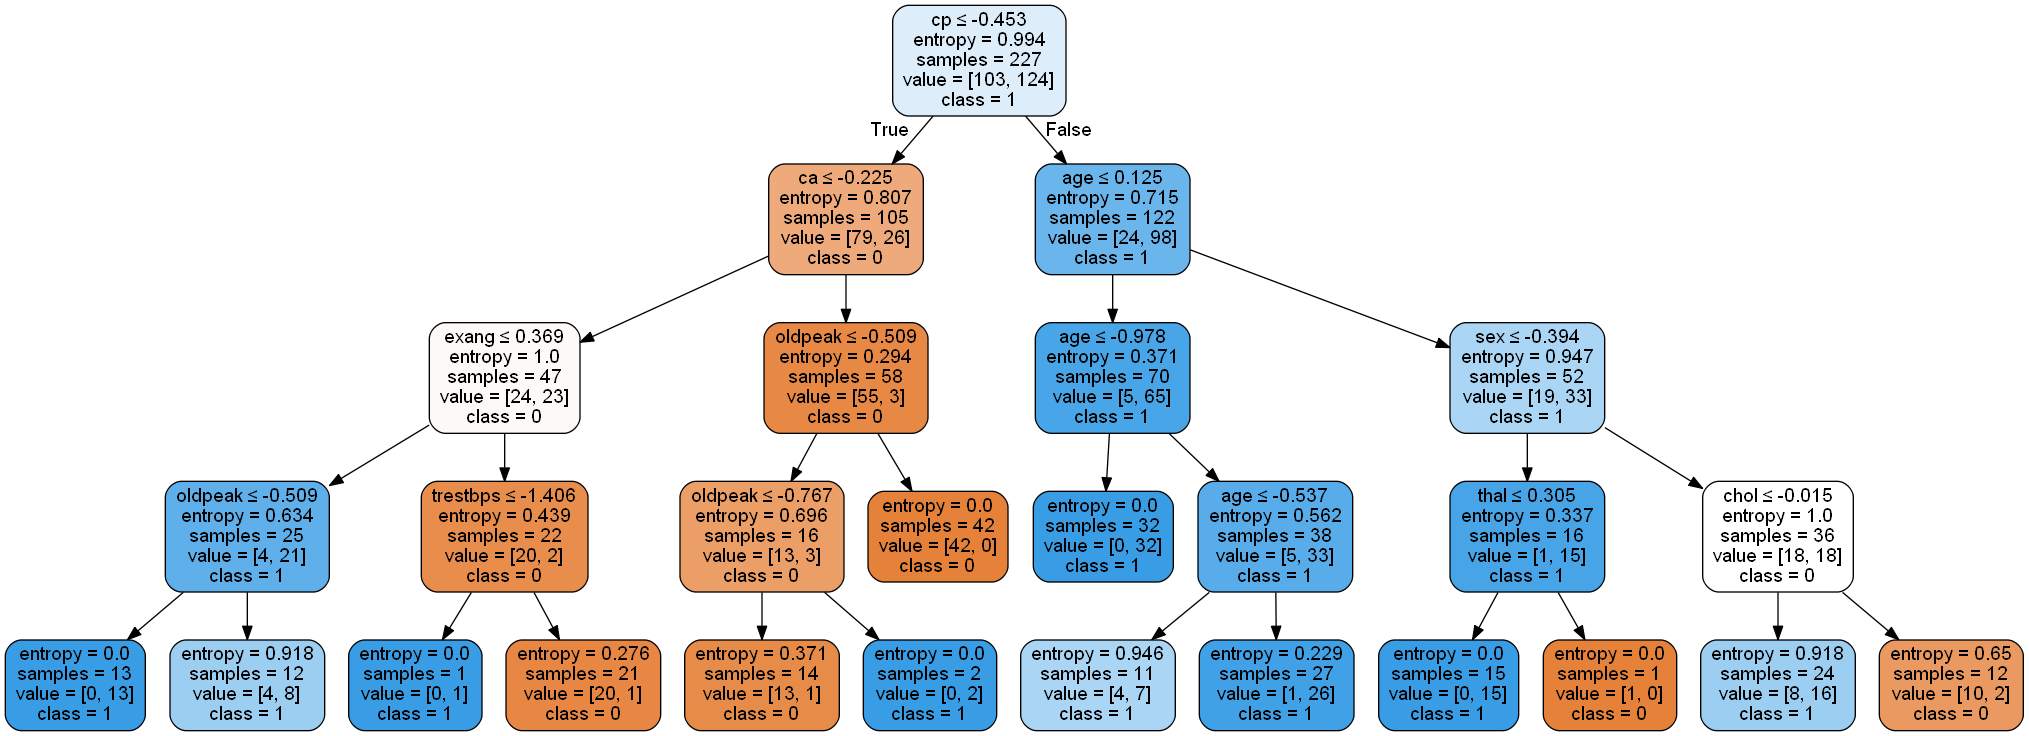

In [39]:
dot_data=StringIO()
export_graphviz(dt1,
               out_file=dot_data,
               filled=True,
               rounded=True,
               special_characters=True,
               feature_names=x.columns,
               class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_pruned.png')
Image(graph.create_png())

## By using RandomForestClassifier

In [48]:
# importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
# train the data
rf.fit(x_train,y_train)
# predicting the response of the test data
y_pred=rf.predict(x_test)

In [49]:
print('Accuracy_score:',accuracy_score(y_pred,y_test))

Accuracy_score: 0.7236842105263158


## By using SVM

In [42]:
# importing the SVM classifier
from sklearn.svm import SVC
svm=SVC()
# train the data
svm.fit(x_train,y_train)
# predicting the response of the test data
y_pred=svm.predict(x_test)

In [43]:
print('Accuracy_score:',accuracy_score(y_pred,y_test))

Accuracy_score: 0.8026315789473685
